# En este notebook se leen fotogramas de un video y se obtiene la foto (tambien la guarda) y predicción del label box

In [1]:
import cv2
import time
import warnings; warnings.simplefilter('ignore')
import os

In [2]:
# Lanzamos nuestro otro notebook donde cargamos nuestro modelo y definimos las multiples funciones que usaremos
start_time = time.time()
%run FuncionesYolo.ipynb
print("--- %s seconds ---" % (time.time() - start_time))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
--- 19.60091471672058 seconds ---


In [3]:
# definimos los inputs fijos de nuestro modelo (tamaño de la fotografia, anchors y el threshhold):
input_w, input_h = 128, 128
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
class_threshold = 0.85
c= 15 # los fotograms que queremos queignore antes seleccionar el siguiente. 30 equivale a avanzar 1 segundo. 15 equivale a 0,5 segundos
eliminamos = True #Si marcamos True, las imagenes seran eliminadas al instante. Las tenemos que crear temporalmente por el modelo.

In [4]:
def entrasale(lista):
    ent=(lista[0]+lista[1])/2
    sal=(lista[-1]+lista[-2])/2
    if sal>ent:
        return("Añadir")
    if ent>sal:
        return("Quitar")

In [5]:
import winsound
frequency = 3000  # Set Frequency To 3500 Hertz
duration = 350  # Set Duration To 250 ms == 1/4 second
frequency1=300   # Set Frequency To 300 Hertz
winsound.Beep(frequency, duration)
winsound.Beep(frequency1, duration)

In [6]:
#definimos el listado de precios de cada producto
precios=[1.23, 1.75, 2.22, 3.99, 4.00, 5.50, 1.99, 2.50, 0.99, 1.75]
precio={}
i=0
for e in labels:
    precio[e]=precios[i]
    i=i+1
precio    

{'ArrozCondis': 1.23,
 'ArrozExtra': 1.75,
 'HuevosFrescos': 2.22,
 'HuevosLibertad': 3.99,
 'KetchupCondis': 4.0,
 'KetchupHeinz': 5.5,
 'LecheAsturiana': 1.99,
 'LecheAto': 2.5,
 'MacarronesCondis': 0.99,
 'MacarronesGallo': 1.75}

In [7]:
#definimos una funcion que nos calcula el precio total de la lista dados dos diccionarios, el de precios individual, y el de la lista de la compra
def precioproductos(precio, lista_actual):
    suma=0
    for e in lista_actual:
        if lista_actual[e]!=0:
            valor= lista_actual[e]*precio[e]
            suma=suma+valor        
    
    return suma

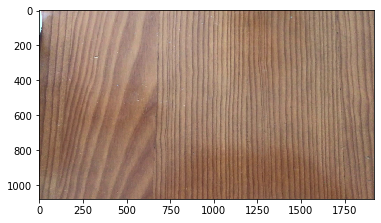

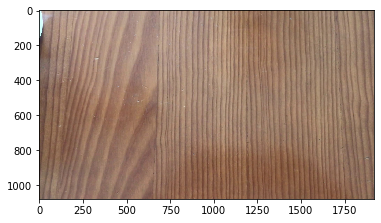

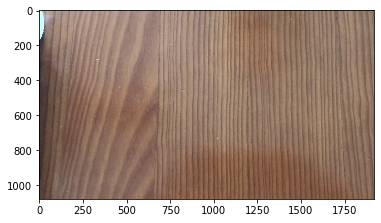

Hemos detectado un nuevo producto:  ArrozExtra


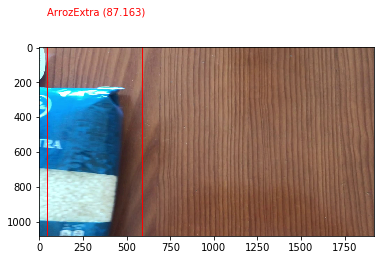

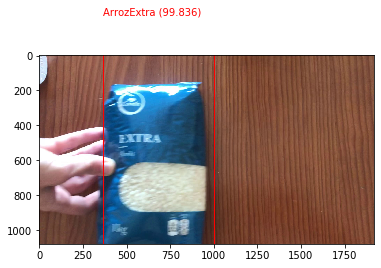

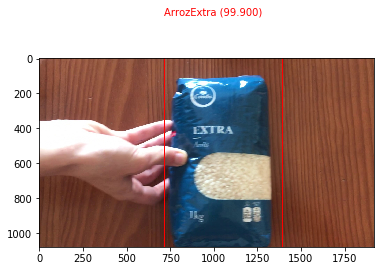

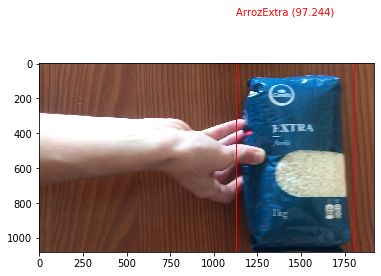

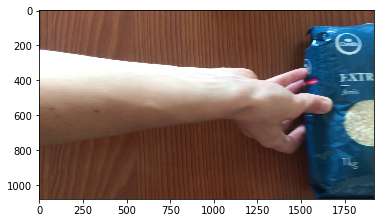

Validamos. Añadimos ArrozExtra a la lista de la compra

La lista de la compra actual es:
{'ArrozCondis': 0, 'ArrozExtra': 1, 'HuevosFrescos': 0, 'HuevosLibertad': 0, 'KetchupCondis': 0, 'KetchupHeinz': 0, 'LecheAsturiana': 0, 'LecheAto': 0, 'MacarronesCondis': 0, 'MacarronesGallo': 0}
El precio total actual de la compra es de 1.75 €




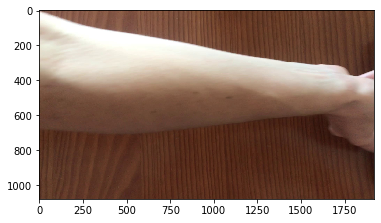

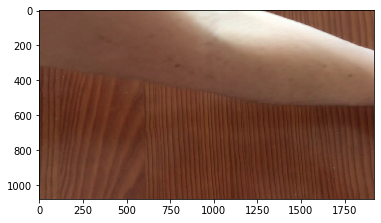

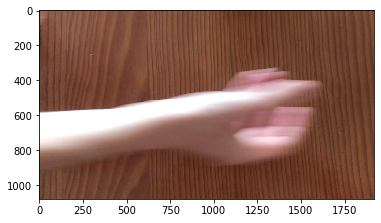

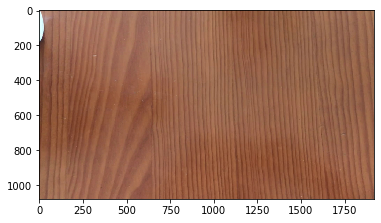

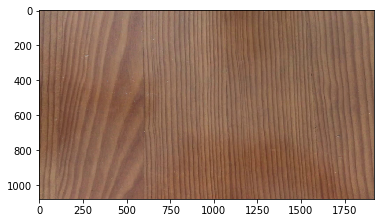

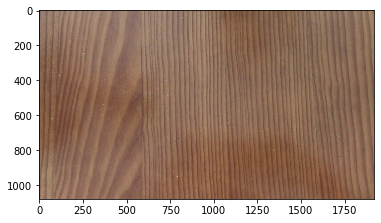

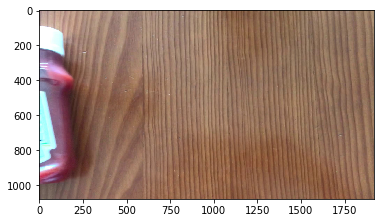

Hemos detectado un nuevo producto:  KetchupHeinz


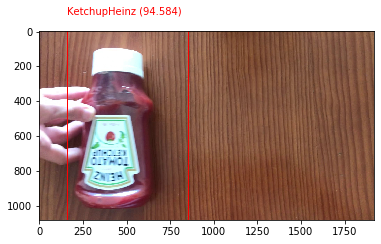

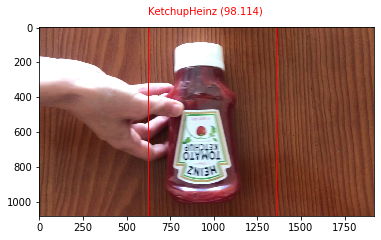

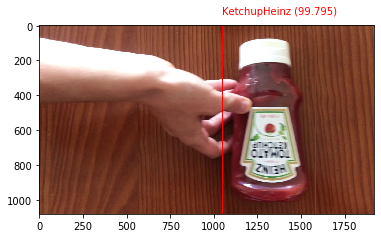

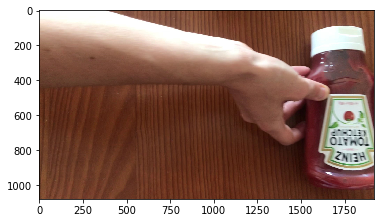

Validamos. Añadimos KetchupHeinz a la lista de la compra

La lista de la compra actual es:
{'ArrozCondis': 0, 'ArrozExtra': 1, 'HuevosFrescos': 0, 'HuevosLibertad': 0, 'KetchupCondis': 0, 'KetchupHeinz': 1, 'LecheAsturiana': 0, 'LecheAto': 0, 'MacarronesCondis': 0, 'MacarronesGallo': 0}
El precio total actual de la compra es de 7.25 €




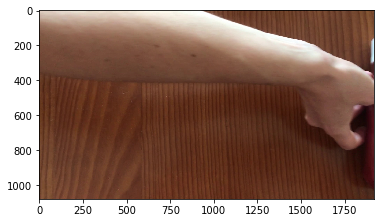

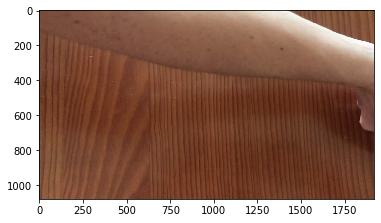

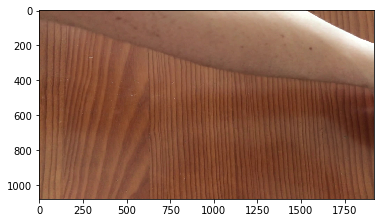

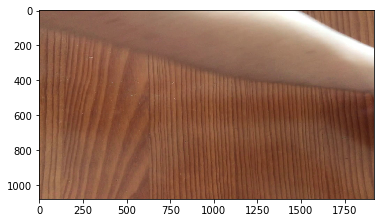

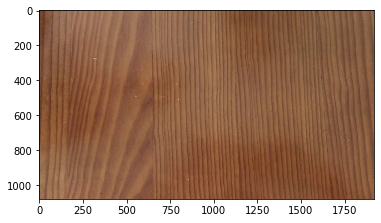

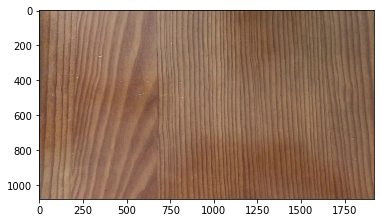

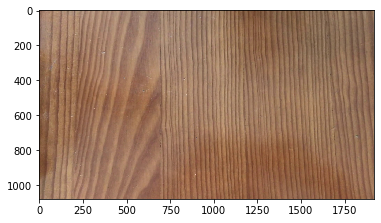

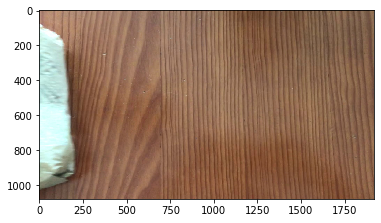

Hemos detectado un nuevo producto:  ArrozCondis


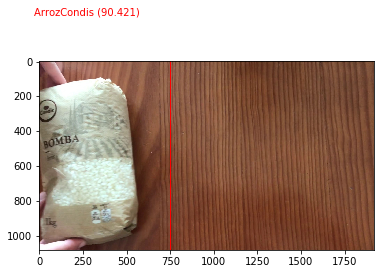

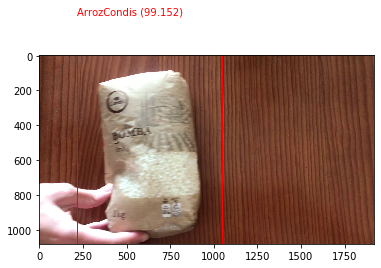

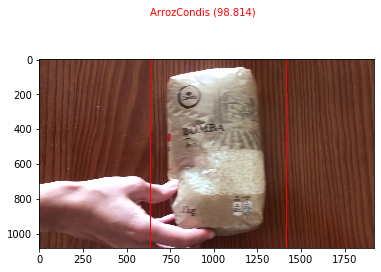

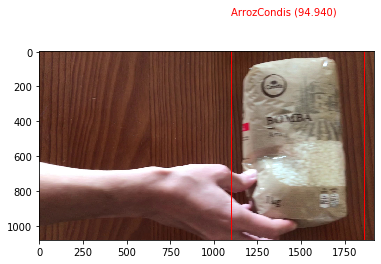

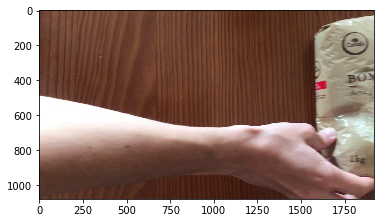

Validamos. Añadimos ArrozCondis a la lista de la compra

La lista de la compra actual es:
{'ArrozCondis': 1, 'ArrozExtra': 1, 'HuevosFrescos': 0, 'HuevosLibertad': 0, 'KetchupCondis': 0, 'KetchupHeinz': 1, 'LecheAsturiana': 0, 'LecheAto': 0, 'MacarronesCondis': 0, 'MacarronesGallo': 0}
El precio total actual de la compra es de 8.48 €




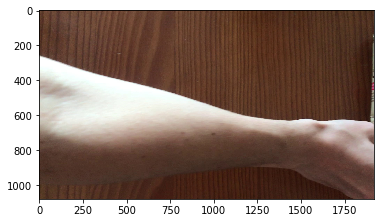

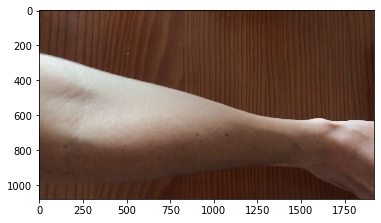

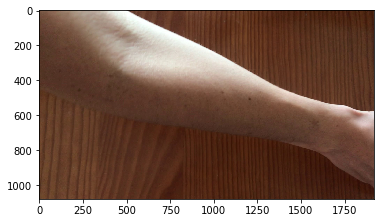

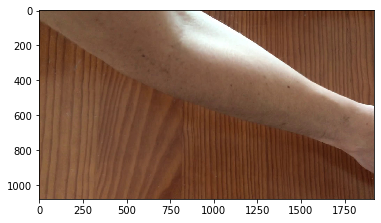

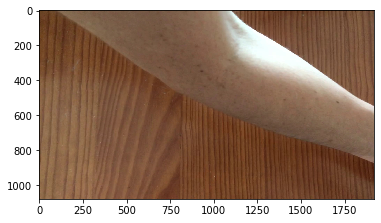

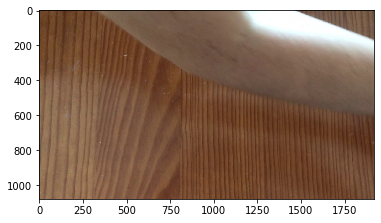

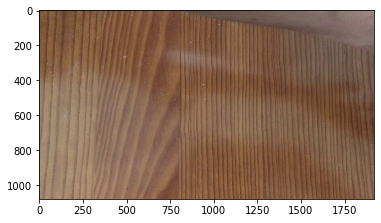

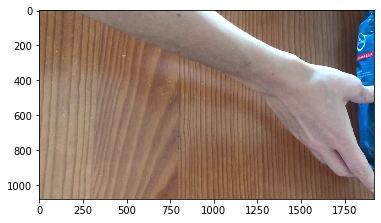

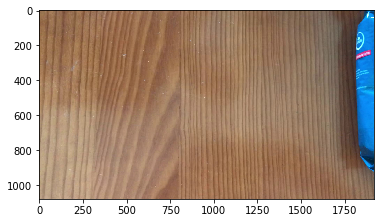

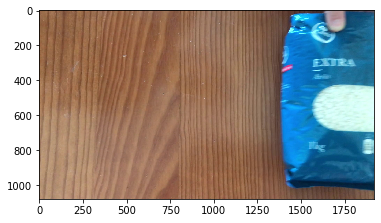

Hemos detectado un nuevo producto:  ArrozExtra


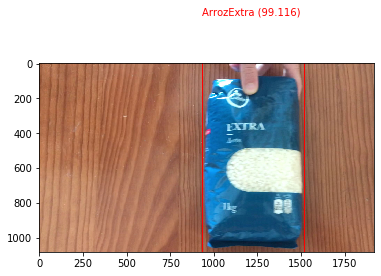

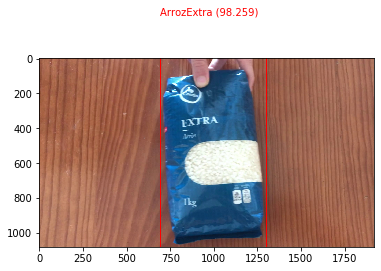

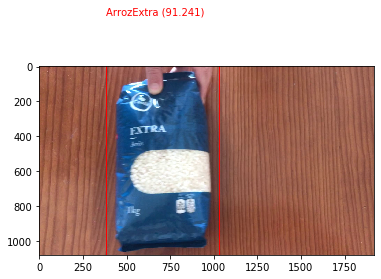

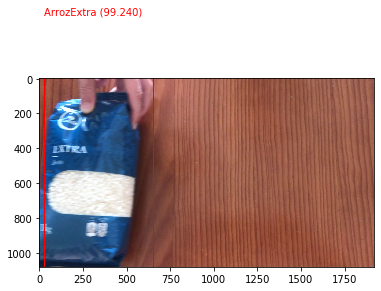

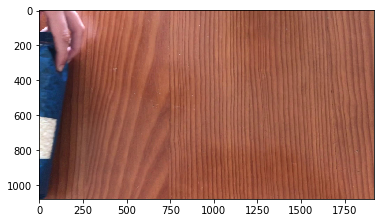

Validamos. Quitamos  ArrozExtra  de a la lista de la compra

La lista de la compra actual es:
{'ArrozCondis': 1, 'ArrozExtra': 0, 'HuevosFrescos': 0, 'HuevosLibertad': 0, 'KetchupCondis': 0, 'KetchupHeinz': 1, 'LecheAsturiana': 0, 'LecheAto': 0, 'MacarronesCondis': 0, 'MacarronesGallo': 0}
El precio total actual de la compra es de 6.73 €




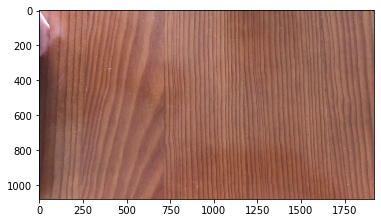

--- 51.6174054145813 seconds ---


In [17]:
d={}
for e in labels:
    d[e]=0
start_time = time.time()

#Importamos nuestro video
cap = cv2.VideoCapture('IMG_3777.MOV')
count = 0
z=0
a=0
b=0
l=[]

while cap.isOpened():
    ret, frame = cap.read() #Accedemos a cada frame

    if ret:
        name='PruebaNotebook/frame'+str(count)+'.jpg' #Definimos donde guardamos nuestras fotografias
        cv2.imwrite(name, frame)
        #print(name + ' creado')
        image, image_w, image_h = load_image_pixels(name, (net_w, net_w)) #Obtenemos nuestas imagenes con el formato deseado
        yolos = yolov3.predict(image) #Hacemos la predicción de nuestro modelo
        boxes = list()
        for i in range(len(yolos)):
            boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh,  net_h, net_w) #decodificamos el outoput de la red
        correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w) #Corregimos el tamaño de los bounding boxes
        do_nms(boxes, nms_thresh) #Eliminamos las non-maximal boxes
        # get the details of the detected objects
        v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold) #Obtenemos los detalles del objeto detectado
        
        
        if len(v_boxes) == 0:
            z=z+1
            #print("No hay ningun productos detectado")
            if z>=2:

                if len(l)>=3:
                    
                    if entrasale(l) =="Añadir":
                        d[a] = d.get(a, 0) + 1
                        print("Validamos. Añadimos " +str(a) + " a la lista de la compra")
                        winsound.Beep(frequency, duration)
                        
                    else:
                        d[a] = d.get(a, 0) - 1
                        print("Validamos. Quitamos ",a, " de a la lista de la compra")
                        winsound.Beep(frequency1, duration)
                
                    print("\nLa lista de la compra actual es:")
                    print(d)
                    print("El precio total actual de la compra es de", precioproductos(precio, d),"€")
                    print("\n")
                
                a=0
                b=0
                l=[]    
                z=0    
        
        
        for i in range(len(v_boxes)):

            
            if v_labels[i] == a:
                l.append(v_boxes[i].xmin)
                
             
            
            
            
            else:
                l=[]
                a, b = v_labels[i], v_boxes[i].xmin
                l.append(b)
                print("Hemos detectado un nuevo producto: ", a)
            
            z=0

            
            
            
            
            
            
            
        draw_boxes(name, v_boxes, v_labels, v_scores) #Dibujamos nuestro fotografia con el objeto labelizado       
    
        
        
        
        
        
        
        
        
        
        count += c # Seleccionamos cuanto queremos que avance para seleccionar otro frame. Con 30 fps, avancamos 1 segundo
        cap.set(1, count)
        
        if eliminamos == True: #Marcamos si queremos eliminar o no las imagenes creadas.
            os.remove(name)
        
        #if (count/30)%10 == 0:
            #print("\n \n Estamos en el fotograma "+str(count))
            #print("Hemos estudiado " + str(count/30) + " segundos de video \n \n")
        

    else:
        cap.release()
        break
print("--- %s seconds ---" % (time.time() - start_time))

In [18]:
d

{'ArrozCondis': 1,
 'ArrozExtra': 0,
 'HuevosFrescos': 0,
 'HuevosLibertad': 0,
 'KetchupCondis': 0,
 'KetchupHeinz': 1,
 'LecheAsturiana': 0,
 'LecheAto': 0,
 'MacarronesCondis': 0,
 'MacarronesGallo': 0}

In [10]:
count/60

12.0

In [11]:
hola=[1,2,4]

In [12]:
len(hola)

3

In [13]:
hola[0]

1

In [14]:
hola[1]

2

In [15]:
hola[-2]

2